# Diabetes Indicators Analysis
Here you can find the description of all the tasks. Same info and more can be found on this Project [Page](https://cms.master.school/final-project-jan23)

First review the project on this page and if you decide to work on this dataset follow the steps mentioned on above Project page

## The story Behind The Data
Diabetes is one of the most prevalent chronic diseases in the US, impacting millions of Americans each year and exerting a significant financial burden on the economy. 
Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. 
After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. 
This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. 
Diabetes is generally characterised by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

The goal in this project is to explore some of the following research questions:

1. Can survey questions from the data in this project provide accurate predictions of whether an individual has diabetes?
2. What risk factors are most predictive of diabetes risk?
3. Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?
4. Can we create a short form of questions from the datasets in this task using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes, based on the analysis one will conduct?

**A full ERD can be found [here](https://dbdiagram.io/d/638ceb8abae3ed7c4544a0da)**

# Data Description
In this task, few datasets are provided:

1. **`demographic_data.csv` - contains demographic data per each person**
    - `uniqueID` - responder ID. Represents one person
    - `Sex`- 0 = female 1 = male
    - `Age` - Age in category (see mapping below) -
        
        *1 - (18 <= AGE <= 24)*
        
        *2 - (25 <= AGE <= 29)*
        
        *3 - (30 <= AGE <= 34)*
        
        *4 - (35 <= AGE <= 39)*
        
        *5 - (40 <= AGE <= 44)*
        
        *6 - (45 <= AGE <= 49)*
        
        *7 - (50 <= AGE <= 54)*
        
        *8 - (55 <= AGE <= 59)*
        
        *9 - (60 <= AGE <= 64)*
        
        *10 - (65 <= AGE <= 69)*
        
        *11 - (70 <= AGE <= 74)*
        
        *12 - (75 <= AGE <= 79)*
        
        *13 - (80 <= AGE <= 99)*
        
        *14 - Don’t know / Refused to answer / Missing*
        
    - `Education` - Education category (see mapping below) -
        *1, 2, 3 - Didn’t graduate high school
        4 - Graduated high school
        5 - Attended college or technical school
        6 - Graduated college or technical school
        9 - Don’t know / Refused to answer / Missing*
    - `Income` - Income category (see mapping below) -
        
        1, 2 - income less than $15,000
        3, 4 - $15,000 <= income < $25,000
        5 - $25,000 <= income < $35,000
        6 - $35,000 to less than $50,000
        7, 8 - income >= $50,000
        9 - Don’t know / Not sure / Missing Respondents
        
2. **`id_label.csv` (Note: This file contains the label for this dataset)**
    - `uniqueID` - responder ID. Represents one person
    - `Diabetes_binary` - 0 is for no diabetes, and 1 is for prediabetes or diabetes
3. **`health_measures.csv` - contains relevant health measures per each person**
    - `uniqueID` - responder ID. Represents one person
    - `NoDocbcCost`- Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
    - `AnyHealthCare` - Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
    - `CholCheck` - 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
    - `DiffWalk` - Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
    - `HvyAlcoholConsump` - (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
    - `Stroke` - (Ever told) you had a stroke. 0 = no 1 = yes
    - `Veggies` - Consume Vegetables 1 or more times per day 0 = no 1 = yes
    - `HighBP` - (Blood Pressure) 0 = no high BP 1 = high BP
    - `HeartDiseaseorAttack` - coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
    - `PhysActivity` - physical activity in past 30 days - not including job; 0 = no 1 = yes
    - `MentHlth` - days of poor mental health scale 1-30 days
    - `HighChol` - 0 = no high cholesterol 1 = high cholesterol
    - `BMI` - Body Mass Index
    - `GenHlth` - Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
    - `Fruits` - Consume Fruit 1 or more times per day 0 = no 1 = yes
4. **`enriched_data.csv` -** extra data gathered per each person and contains few more measures
    - `uniqueID` - responder ID. Represents one person
    - `PhysHlth` - physical illness or injury count of days in past 30 days, scale 1-30
    - `Smoker` - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

# SQL tasks

1. What is the average physical illness in the data?
2. Among smoker vs. non-smoker, please calculate the following metrics:
    1. the amount of diabetes vs. non diabetes can be found in the data?
    2. the avg, min and max physical illness can be found in the data?
3. How many (absolute) smokers do we have that are having serious difficulty walking or climbing stairs as well?
4. What is the distribution (in %) in diabetes among education categories and men, out of all men smokers?
5. Some hospitals had approached you and are asking for some information. Please help them get the following -
    1. Please generate a table of each education level, and the top 5 persons (by ID), where the persons are ranked according to their BMI, DESC
    2. Let’s create a new metric per each person, called “BMIToMentalActivityRatio” - calculated as: BMI / mental activity.
    Note: If one of the “base metrics” is 0, put a 0 to that specific record in our new metric column.
    Once we have this column, let’s understand per each income level, who are the top 7 persons with the highest ratio

In [1]:
-- What is the average physical illness in the data?

SELECT AVG(PhysHlth) AS average_physical_illness
FROM enriched_data;

-- The average physicall illness among the data is 4.24 

,average_physical_illness
0,4.242081


In [2]:
-- Among smoker vs. non-smoker, please calculate the following metrics:
-- the amount of diabetes vs. non diabetes can be found in the data?
-- the avg, min and max physical illness can be found in the data?

SELECT CASE
        WHEN Smoker = 1 THEN 1 ELSE 0 END AS smoker_status,
        CASE WHEN Diabetes_binary = 1 THEN 1 ELSE 0 END AS diabetes_status,
        COUNT(Diabetes_binary),
        AVG(PhysHlth) AS average_physical_illness,
        MIN(PhysHlth) AS min_physical_illness,
        MAX(PhysHlth) AS max_physical_illness
FROM enriched_data AS e
JOIN id_label AS i
ON e.uniqueID = i.uniqueID
GROUP BY smoker_status, diabetes_status

,smoker_status,diabetes_status,count,average_physical_illness,min_physical_illness,max_physical_illness
0,0,0,124228,2.852288,0,30
1,0,1,17029,6.867403,0,30
2,1,0,94106,4.682358,0,30
3,1,1,18317,8.965114,0,30


In [3]:
-- How many (absolute) smokers do we have that are having serious difficulty walking or climbing stairs as well?
SELECT COUNT(Smoker)
FROM enriched_data AS e
JOIN health_measures AS h
ON e.uniqueID = h.uniqueID
WHERE Smoker = 1 AND DiffWalk = 1

,count
0,24685


In [4]:
-- What is the distribution (in %) in diabetes among education categories and men, out of all men smokers?
WITH men_smokers AS (
  SELECT demographic_data.uniqueID
  FROM demographic_data
  JOIN enriched_data ON demographic_data.uniqueID = enriched_data.uniqueID
  WHERE demographic_data.Sex = 1 AND enriched_data.Smoker = 1
),
men_smokers_diabetes AS (
  SELECT men_smokers.uniqueID, id_label.Diabetes_binary
  FROM men_smokers
  JOIN id_label ON men_smokers.uniqueID = id_label.uniqueID
)
SELECT Education, COUNT(men_smokers_diabetes.uniqueID) AS total,
  SUM(CASE WHEN Diabetes_binary = 1 THEN 1 ELSE 0 END) AS diabetes,
 ROUND( SUM(CASE WHEN Diabetes_binary = 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(men_smokers_diabetes.uniqueID), 2) AS diabetes_percent
FROM men_smokers_diabetes
JOIN demographic_data ON men_smokers_diabetes.uniqueID = demographic_data.uniqueID
GROUP BY Education




,education,total,diabetes,diabetes_percent
0,1,39,10,25.64
1,2,1186,347,29.26
2,3,2924,716,24.49
3,4,16753,3185,19.01
4,5,15662,2908,18.57
5,6,18800,2831,15.06


In [5]:
-- Some hospitals had approached you and are asking for some information. Please help them get the following -
-- Please generate a table of each education level, and the top 5 persons (by ID), where the persons are ranked according to their BMI, DESC

WITH cte AS (SELECT d.uniqueID AS id,
       Education,
       BMI,
       RANK() OVER (PARTITION BY Education ORDER BY BMI DESC) AS rank
FROM demographic_data AS d
JOIN health_measures AS h
ON d.uniqueID = h.uniqueID)
SELECT * 
FROM cte 
WHERE rank <=5

       

,id,education,bmi,rank
0,100832,1,57,1
1,173846,1,56,2
2,9511,1,52,3
3,88546,1,51,4
4,76212,1,50,5
5,79543,2,84,1
6,76378,2,81,2
7,76442,2,81,2
8,76505,2,79,4
9,142744,2,75,5


In [6]:
-- Let’s create a new metric per each person, called “BMIToMentalActivityRatio” - calculated as: BMI / mental activity.
-- Note: If one of the “base metrics” is 0, put a 0 to that specific record in our new metric column. Once we have this column, let’s understand per each income level, who are the top 7 persons with the highest ratio

WITH bmi_mental_activity_ratio AS (
  SELECT uniqueID, COALESCE(health_measures.BMI / nullif(health_measures.MentHlth,0),0) AS BMIToMentalActivityRatio
  FROM health_measures
),
bmi_per_income AS (
  SELECT demographic_data.Income, bmi_mental_activity_ratio.uniqueID, bmi_mental_activity_ratio.BMIToMentalActivityRatio
  FROM demographic_data
  JOIN bmi_mental_activity_ratio ON demographic_data.uniqueID = bmi_mental_activity_ratio.uniqueID
  ORDER BY demographic_data.Income, bmi_mental_activity_ratio.BMIToMentalActivityRatio DESC
)
SELECT uniqueID, Income, BMIToMentalActivityRatio
FROM (
   SELECT *, 
          RANK() OVER(PARTITION BY Income ORDER BY BMIToMentalActivityRatio DESC) as rank
   FROM bmi_per_income
) AS t
WHERE rank <= 7







,uniqueid,income,bmitomentalactivityratio
0,111105,1,44
1,213505,1,44
2,213242,1,42
3,50020,1,42
4,177673,1,42
5,8417,1,42
6,179154,1,42
7,58641,2,56
8,212589,2,54
9,203723,2,47


## Tableau Tasks

This Tableau task lets you be creative with the way you build your dashboard and only gives guidance on the types of visualisations you should use.

Create a dashboard that will contain at least 5 out of the 7 requirements defined below:

1. **At least 2 KPIs** as Big Ass Numbers. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
    - % of diabetic patients out of all patients
    - % of smokers out of all diabetic patients
    - etc.
2. **A Bar Chart**, for example, comparing one or more patient characteristics and the corresponding amount of diabetic and non-diabetic patients. 
3. **A Bar Chart using Quick Table Calculation**, for example, for each combination of patient characteristics comparing the % of diabetic and non-diabetic patients.
4. **A Highlight Table (Heatmap)**, for example, between education and income level, where each cell corresponds to % of Total patients in each combination. By building two such heatmaps you can compare diabetic and non-diabetic patients.
5. **A Pareto Analysis** based on a custom-defined **patient segment** to answer a question: Which patient segments make up 80% out of all patients with diabetes? 
    - Segment can include values from the demographic and/or health information of the client. For example,
        - Education | Income | Smoker | Alcohol Consumption
        - Age | Physical Activity | BMI
        - etc.
6. **At least 1 parameter** that allows dashboard user to interact with the dashboard. For example,
    - to change the health measure you are looking at at your graph
    - to change the metric from relative to absolute
    - to choose multiple parameter values based on user own characteristics and see the risk of having diabetes with such values (but can also be done with filters depending on the approach)
7. At least one **more visualization of your choice** adds value to your analysis.

_Use this cell to add your Tableau links. We encourage you also to add here screenshots from your Tableau dashboard with explanations._
[(https://public.tableau.com/app/profile/sindi.albornoz/viz/DiabetesIndicators/Dashboard1)]
![Dasboard screenshot](Dasboard%20screenshot.png)

Explanation

Over the past four decades, the global incidence of diabetes has seen a significant increase. In the United States, diabetes is a prevalent chronic condition that affects a significant portion of the population. The dashboard presents an analysis of diabetes indicators, including age range and gender, to provide a comprehensive understanding of this disease.

_For_ deep dive analysis and EDA follow the guidelines on project [Page](https://cms.master.school/final-project-jan23)

In [7]:
# Let's see how we can easily query the data
# Start working here if you choose to use Python for this part of the project
# Libraries
import numpy as np
import pandas as pd
#Importing Visualization Library Seaborn and Matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
pd.set_option('max_colwidth', None)

In [8]:
# Let's load and see some values
demographic_df = pd.read_csv("demographic_data.csv")
enriched_df = pd.read_csv("enriched_data.csv")
health_measures_df = pd.read_csv("health_measures.csv")
id_label_df = pd.read_csv("id_label.csv")

In [9]:
# Checking the columns of each data frame
print(demographic_df.head(3))
print(enriched_df.head(3))
print(health_measures_df.head(3))
print(id_label_df.head(3))

   uniqueID  Sex  Age  Education  Income
0         0    0    9          4       3
1         1    0    7          6       1
2         2    0    9          4       8
   uniqueID  PhysHlth  Smoker
0         0        15       1
1         1         0       1
2         2        30       0
   uniqueID  HeartDiseaseorAttack  ...  NoDocbcCost  AnyHealthcare
0         0                     0  ...            0              1
1         1                     0  ...            1              0
2         2                     0  ...            1              1

[3 rows x 16 columns]
   uniqueID  Diabetes_binary
0         0              0.0
1         1              0.0
2         2              0.0


In [10]:
# let see the info for each data frame
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   uniqueID   253680 non-null  int64
 1   Sex        253680 non-null  int64
 2   Age        253680 non-null  int64
 3   Education  253680 non-null  int64
 4   Income     253680 non-null  int64
dtypes: int64(5)
memory usage: 9.7 MB


In [11]:
health_measures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   uniqueID              253680 non-null  int64
 1   HeartDiseaseorAttack  253680 non-null  int64
 2   BMI                   253680 non-null  int64
 3   DiffWalk              253680 non-null  int64
 4   GenHlth               253680 non-null  int64
 5   HighBP                253680 non-null  int64
 6   HighChol              253680 non-null  int64
 7   CholCheck             253680 non-null  int64
 8   MentHlth              253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  Stroke                253680 non-null  int64
 11  Fruits                253680 non-null  int64
 12  PhysActivity          253680 non-null  int64
 13  HvyAlcoholConsump     253680 non-null  int64
 14  NoDocbcCost           253680 non-null  int64
 15  AnyHealthcare         253680 non-n

In [12]:
enriched_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   uniqueID  253680 non-null  int64
 1   PhysHlth  253680 non-null  int64
 2   Smoker    253680 non-null  int64
dtypes: int64(3)
memory usage: 5.8 MB


In [13]:
id_label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   uniqueID         253680 non-null  int64  
 1   Diabetes_binary  253680 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.9 MB


In [14]:
#Describing dataframe health_measures_df

health_measures_df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,253680.0,126839.500000,73231.252481,0.0,63419.75,126839.5,190259.25,253679.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.00,0.0,0.00,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.00,27.0,31.00,98.0
DiffWalk,253680.0,0.168224,0.374066,0.0,0.00,0.0,0.00,1.0
GenHlth,253680.0,2.511392,1.068477,1.0,2.00,2.0,3.00,5.0
HighBP,253680.0,0.429001,0.494934,0.0,0.00,0.0,1.00,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.00,0.0,1.00,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.00,1.0,1.00,1.0
MentHlth,253680.0,3.184772,7.412847,0.0,0.00,0.0,2.00,30.0
Veggies,253680.0,0.811420,0.391175,0.0,1.00,1.0,1.00,1.0


In [15]:
# Let chech the BMI that appears to have some outliers
print((health_measures_df['BMI']>60).value_counts())
print((health_measures_df['BMI']<18).value_counts())

False    252875
True        805
Name: BMI, dtype: int64
False    252356
True       1324
Name: BMI, dtype: int64


In [16]:
#checking unique values in different variables


unique_values = {}
for col in health_measures_df.columns:
    unique_values[col] = health_measures_df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
uniqueID,253680
HeartDiseaseorAttack,2
BMI,84
DiffWalk,2
GenHlth,5
HighBP,2
HighChol,2
CholCheck,2
MentHlth,31
Veggies,2


In [17]:
# Describing data drame demographic_df
demographic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,253680.0,126839.500000,73231.252481,0.0,63419.75,126839.5,190259.25,253679.0
Sex,253680.0,0.440342,0.496429,0.0,0.00,0.0,1.00,1.0
Age,253680.0,8.032119,3.054220,1.0,6.00,8.0,10.00,13.0
Education,253680.0,5.050434,0.985774,1.0,4.00,5.0,6.00,6.0
Income,253680.0,6.053875,2.071148,1.0,5.00,7.0,8.00,8.0


In [18]:
#Cheking for unique values in the demographic dataframe
u_values = {}
for col in demographic_df.columns:
    u_values[col] = demographic_df[col].value_counts().shape[0]

pd.DataFrame(u_values, index=['unique value count']).transpose()

,unique value count
uniqueID,253680
Sex,2
Age,13
Education,6
Income,8


In [19]:
# Describing id_label dataframe
id_label_df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,253680.0,126839.500000,73231.252481,0.0,63419.75,126839.5,190259.25,253679.0
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.00,0.0,0.00,1.0


In [20]:
#Lastly, describing enriched data dataframe
enriched_df.describe().T

,count,mean,std,min,25%,50%,75%,max
uniqueID,253680.0,126839.500000,73231.252481,0.0,63419.75,126839.5,190259.25,253679.0
PhysHlth,253680.0,4.242081,8.717951,0.0,0.00,0.0,3.00,30.0
Smoker,253680.0,0.443169,0.496761,0.0,0.00,0.0,1.00,1.0


- The dataset contains 253,680 observations
- There are no missing values in the columns
- All columns datatype are integer except for the column Diabetes_binary which is a float. It is recommended to change the datatype of the "uniqueID" and "Diabetes_binary" columns
- There are potential outliers in the "BMI" column of the "health_measure" dataframe, where values higher than 60 and lower than 18 are observed. These values may indicate a person who is 5 feet or less in height but weighs more than 600 pounds and a person that is tall underweight, also we know it does not refer to a kid since the dataset contains people starting 18 which is a rare occurrence. To address this issue, one approach could be to remove these outliers, as they do not represent a significant portion of the dataset and there is no information available on the patient's height and weight to recalculate these values

## Data CLeaning

- I have determined that merging all tables will facilitate the exploratory analysis and provide access to all relevant columns for evaluating correlations between variables. This will ensure clarity and enhance efficiency.
-  I will convert the datatype of the column 'Diabetes_binary' from float to integer to align with the datatypes of the other variables. 
- Based on the results of my analysis, I may consider converting the datatypes of other columns from integer to categorical, if necessary for producing accurate graphs. If not, I will maintain their integer format.

In [21]:
#let merge all tables on uniqueID but first, I will make a copy of the table to not affect the original data.
demographic_copy = demographic_df.copy()
enriched_copy = enriched_df.copy()
healt_copy = health_measures_df.copy() 
id_label_copy = id_label_df.copy() 

In [22]:
# Merging the tables
diabetes = demographic_copy.merge(enriched_copy, on='uniqueID').merge(healt_copy, on='uniqueID').merge(id_label_copy, on='uniqueID')

#Checking the dataframe
diabetes.head(3)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   uniqueID              253680 non-null  int64  
 1   Sex                   253680 non-null  int64  
 2   Age                   253680 non-null  int64  
 3   Education             253680 non-null  int64  
 4   Income                253680 non-null  int64  
 5   PhysHlth              253680 non-null  int64  
 6   Smoker                253680 non-null  int64  
 7   HeartDiseaseorAttack  253680 non-null  int64  
 8   BMI                   253680 non-null  int64  
 9   DiffWalk              253680 non-null  int64  
 10  GenHlth               253680 non-null  int64  
 11  HighBP                253680 non-null  int64  
 12  HighChol              253680 non-null  int64  
 13  CholCheck             253680 non-null  int64  
 14  MentHlth              253680 non-null  int64  
 15  

In [23]:
#Now, converting the Diabetes_binary datatype from float to integer, but first, I will make a copy of the join table.
diabetes_df = diabetes.copy()

# Datatype change
diabetes_df['Diabetes_binary'] = diabetes_df['Diabetes_binary'].astype(int)

# Checking the datatype change
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   uniqueID              253680 non-null  int64
 1   Sex                   253680 non-null  int64
 2   Age                   253680 non-null  int64
 3   Education             253680 non-null  int64
 4   Income                253680 non-null  int64
 5   PhysHlth              253680 non-null  int64
 6   Smoker                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   BMI                   253680 non-null  int64
 9   DiffWalk              253680 non-null  int64
 10  GenHlth               253680 non-null  int64
 11  HighBP                253680 non-null  int64
 12  HighChol              253680 non-null  int64
 13  CholCheck             253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  Veggies               253680 non-n

## Distribution Analysis

During this phase, I will perform a comprehensive analysis on each column to gain an understanding of their distributions and identify any potential patterns.

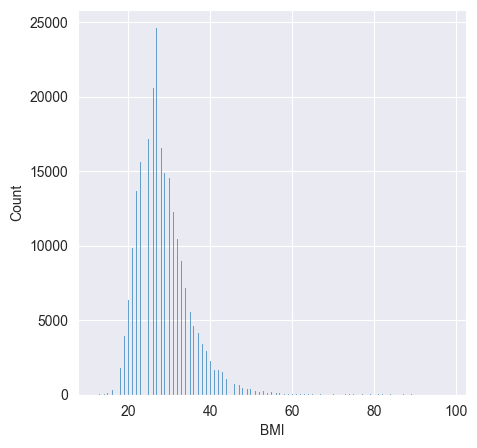

In [24]:
# I will start with the BMI distribution and address the outliers this column presents
sns.set_style('darkgrid')
plt.figure(figsize=(5,5))
sns.histplot(x='BMI', data = diabetes_df)
plt.show()


-We can observe that the distribution of the data is left-skewed, indicating the presence of outliers. To obtain a clearer understanding of the distribution of Body Mass Index (BMI), it may be appropriate to remove these outliers.

In [25]:
# Removing BMI outliers. BMI > 50 AND < 18
diabetes_df = diabetes_df[(diabetes_df.BMI >=18) & (diabetes_df.BMI <=50)]
diabetes_df['BMI'].value_counts()

27    24606
26    20562
24    19550
25    17146
28    16545
23    15610
29    14890
30    14573
22    13643
31    12275
32    10474
21     9855
33     8948
34     7181
20     6327
35     5575
36     4633
37     4147
19     3968
38     3397
39     2911
40     2258
18     1803
41     1659
42     1639
43     1500
44     1043
45      819
46      750
47      622
48      484
49      416
50      372
Name: BMI, dtype: int64

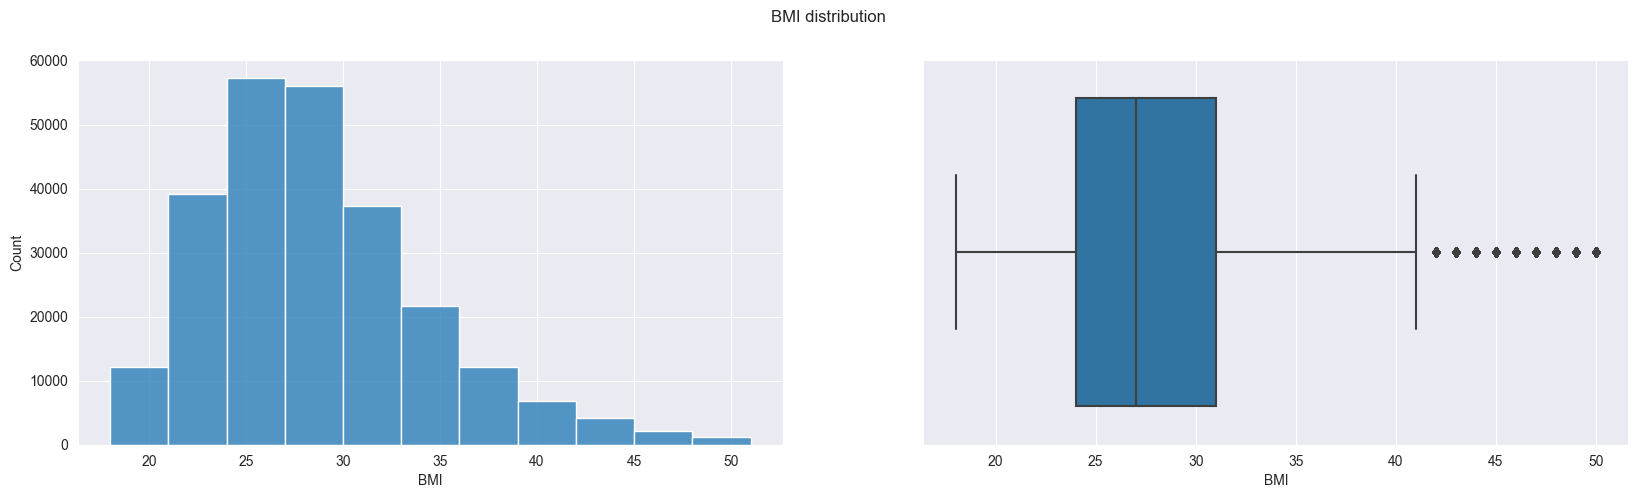

In [26]:
#Replotting the BMI distribution
sns.set_style('darkgrid')
fig = plt.figure(figsize=(20,5))
fig.suptitle('BMI distribution')
plt.subplot(1,2,1)
bins = np.arange(18, diabetes_df['BMI'].max()+3,3)
sns.histplot(x='BMI', data = diabetes_df, bins = bins)


plt.subplot(1,2,2)
sns.boxplot(x='BMI', data = diabetes_df)
plt.show()

The distribution of Body Mass Index (BMI) values in the dataset appears to be slightly left-skewed.The median BMI value in the sample falls within the range of 25 to 30. However, it is noteworthy that there are individuals with BMI values above 30, which may indicate a higher risk for conditions such as overweight, obesity, and morbid obesity.

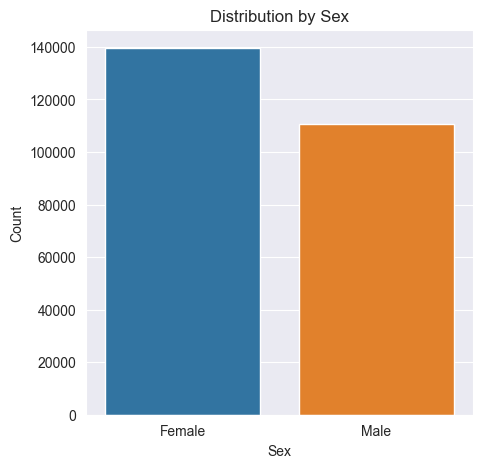

In [27]:
#I will create a function first that it's going to avoid code repetion when assigning the graph's title, x-label and y-label
def add_labels(title, xlabel, ylabel, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

sns.set_style('darkgrid')
# Distribution of sex
plt.figure(figsize=(5,5))
sns.countplot(x='Sex', data=diabetes_df)
plt.gca().set_xticks([0,1])
plt.gca().set_xticklabels(["Female", "Male"])
add_labels("Distribution by Sex", "Sex", "Count")
plt.show()

- The dataset contains approximately 140,000 or 55% Women and approximately 113,680 or 45% Men.

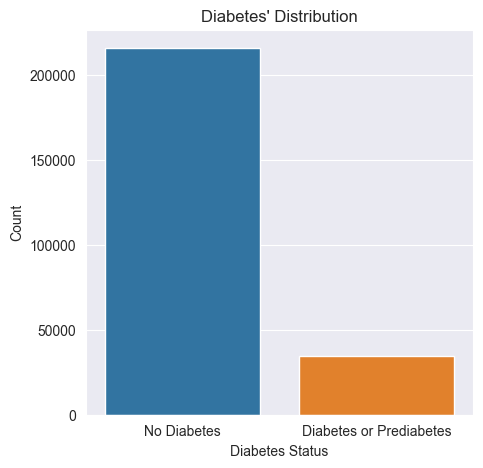

In [49]:
# Distribution of diabetes_binary
plt.figure(figsize=(5,5))
sns.countplot(x='Diabetes_binary', data=diabetes_df)
plt.gca().set_xticks([0,1])
plt.gca().set_xticklabels(["No Diabetes", "Diabetes or Prediabetes"])
add_labels("Diabetes' Distribution", "Diabetes Status", "Count")
plt.savefig('Diabetes_distribution.png')
plt.show()

There is around 35,000 or 13% of the individuals have diabetes or prediabetes out of around 250,000 individuals in the dataset.

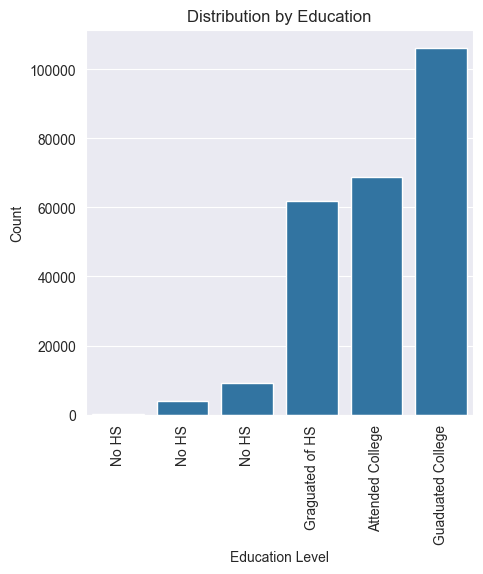

In [29]:
# Next, I will check the distribution of education in the dataset

plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
basecolor = sns.color_palette()[0]
sns.countplot(x='Education', data=diabetes_df, color = basecolor)
plt.gca().set_xticks([0,1,2,3,4,5])
plt.gca().set_xticklabels(["No HS","No HS","No HS", "Graguated of HS", "Attended College", "Guaduated College"])
plt.xticks(rotation = 90)
add_labels("Distribution by Education", "Education Level", "Count")
plt.show()

- It has been noted that over 110,000 individuals have completed their college or technical school education. Conversely, approximately 70,000 individuals have not finished their college education. Additionally, around 62,000 individuals have completed their high school education, whereas 11,680 individuals, representing 4.5% of the dataset, have not graduated from high school.

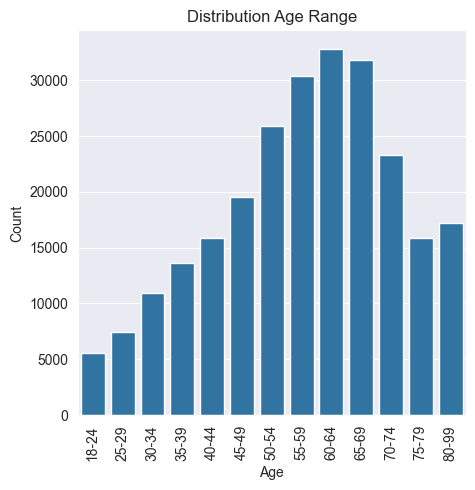

In [30]:
# Next, I'll plot the distribution of the age range column.

plt.figure(figsize=(5,5))
sns.set_style('darkgrid')
basecolor = sns.color_palette()[0]
sns.countplot(x='Age', data=diabetes_df, color = basecolor)
plt.gca().set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.gca().set_xticklabels(["18-24","25-29","30-34", "35-39", "40-44", "45-49","50-54","55-59","60-64","65-69","70-74","75-79","80-99"])
plt.xticks(rotation = 90)
add_labels("Distribution Age Range", "Age", "Count")
plt.show()

- It can be noted that over 50% of the individuals in the dataset fall within the age range of 50 to 74 years. In the upcoming analysis, it will be of interest to examine if there is a correlation between increased age and heightened risk for diabetes.

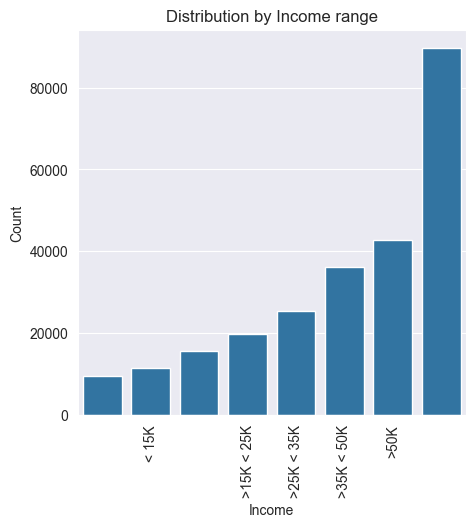

In [31]:
plt.figure(figsize=(5,5))
basecolor = sns.color_palette()[0]
sns.countplot(x='Income', data=diabetes_df, color = basecolor)
plt.gca().set_xticks([1,3,4,5,6])
plt.gca().set_xticklabels(["< 15K",">15K < 25K",">25K < 35K", ">35K < 50K",">50K"])
add_labels("Distribution by Income range", "Income", "Count")
plt.xticks(rotation = 90)
plt.show()

In the next step, I will generate visualizations of the distributions of various health measures represented as binary (yes/no) variables in the data.

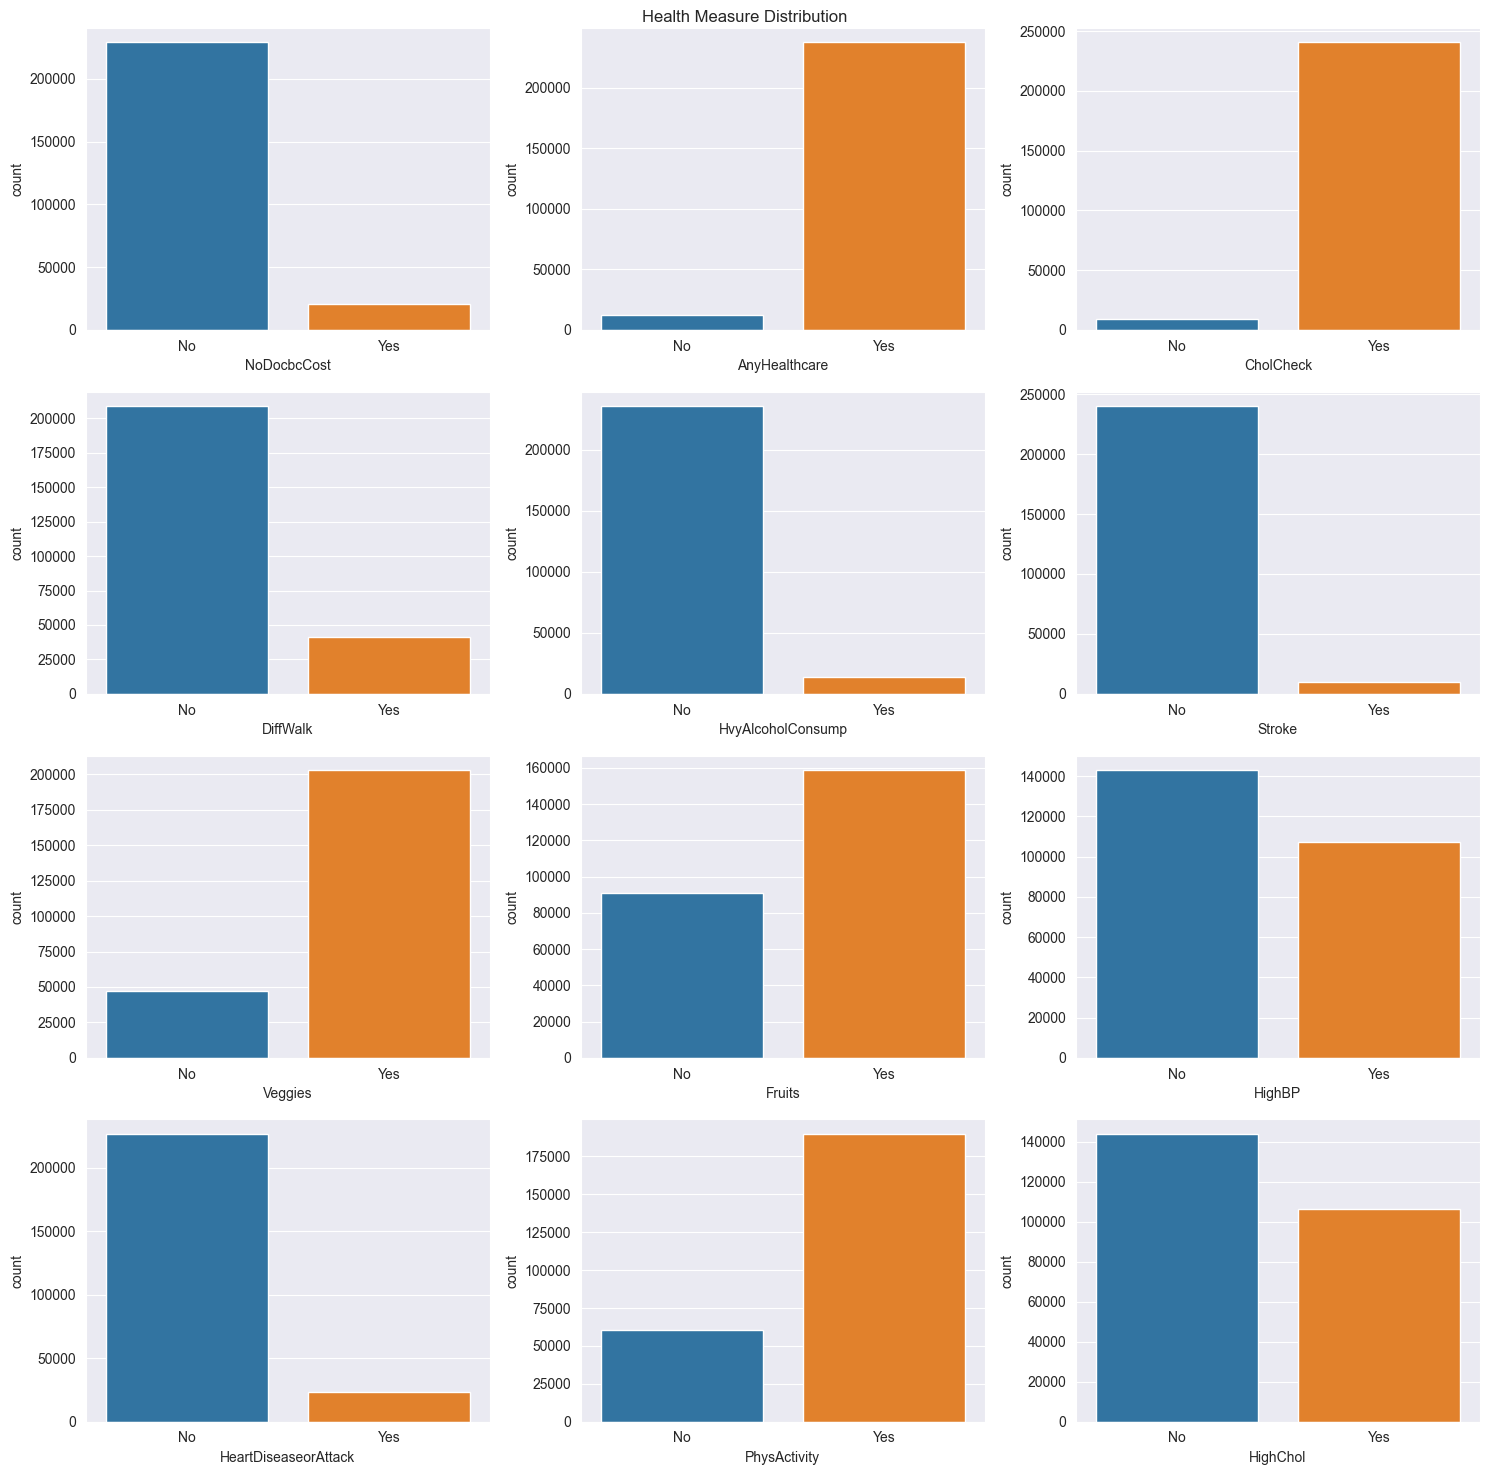

In [32]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Health Measure Distribution')
        
sns.countplot(x ='NoDocbcCost', data = diabetes_df, ax=ax[0,0])
sns.countplot(x ='AnyHealthcare', data = diabetes_df, ax=ax[0,1])
sns.countplot(x='CholCheck', data = diabetes_df, ax=ax[0, 2])
sns.countplot(x='DiffWalk', data = diabetes_df, ax=ax[1, 0])
sns.countplot(x='HvyAlcoholConsump', data=diabetes_df, ax=ax[1, 1])
sns.countplot(x= 'Stroke', data=diabetes_df, ax=ax[1, 2])
sns.countplot(x='Veggies', data=diabetes_df, ax=ax[2, 0])
sns.countplot(x='Fruits', data=diabetes_df, ax=ax[2, 1])
sns.countplot(x='HighBP', data=diabetes_df, ax=ax[2, 2])
sns.countplot(x='HeartDiseaseorAttack', data=diabetes_df, ax=ax[3, 0])
sns.countplot(x='PhysActivity', data=diabetes_df, ax=ax[3, 1])
sns.countplot(x='HighChol', data=diabetes_df, ax=ax[3, 2])
plt.tight_layout()

for i in range(4):
    for j in range(3):
        ax[i,j].set_xticks([0,1])
        ax[i,j].set_xticklabels(['No','Yes'])
        
plt.show()

Most individuals in the dataset are insured and have reported no issues accessing medical care. They also tend to have healthy dietary habits, as the majority consume a diet rich in fruits and vegetables and do not report problematic alcohol consumption. However, a significant proportion, approximately 40%, have reported a history of high blood pressure and 39% have reported elevated cholesterol levels. It would be worthwhile to investigate if there is a correlation between these factors and an increased risk of diabetes or prediabetes.

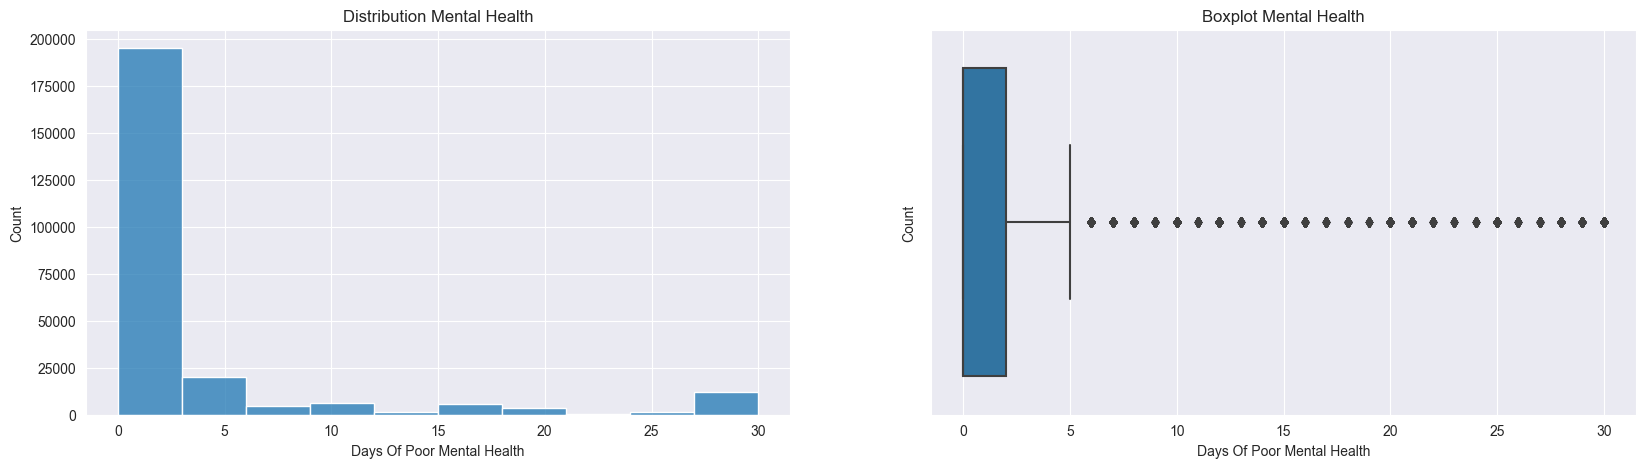

In [33]:
# Next, will check the mental healt distribution, which is measure in the amount of days a individual has struggle with mental healt problems in a month.

plt.figure(figsize=(20,5))
basecolor = sns.color_palette()[0]

plt.subplot(1,2,1)
b_size = np.arange(0, diabetes_df['MentHlth'].max()+3,3)
sns.histplot(x='MentHlth', data=diabetes_df, color = basecolor, bins = b_size)
add_labels("Distribution Mental Health", "Days Of Poor Mental Health", "Count")

plt.subplot(1,2,2)
sns.boxplot(x = 'MentHlth', data= diabetes_df )
add_labels("Boxplot Mental Health", "Days Of Poor Mental Health", "Count")

plt.show()

Almost 200,000 individuals or 75%, has struggled with mental health from 0 to 3 days on average in a month.

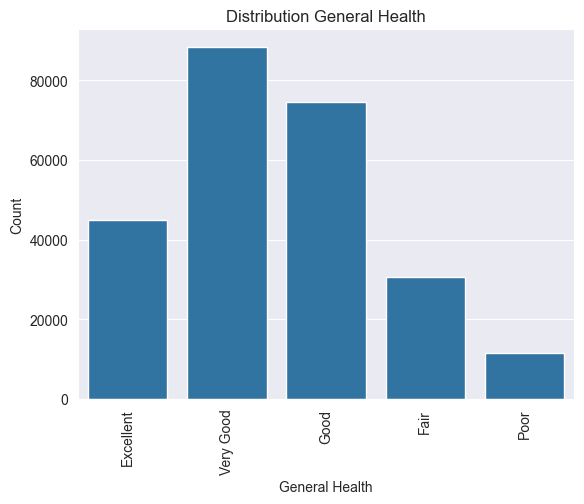

In [34]:
# General health claim for the individuos in the dataset

sns.countplot(x='GenHlth', data=diabetes_df, color = basecolor)
plt.gca().set_xticks([0,1,2,3,4])
plt.gca().set_xticklabels(["Excellent","Very Good","Good", "Fair", "Poor"])
plt.xticks(rotation = 90)
add_labels("Distribution General Health", "General Health", "Count")

plt.show()


We can see, the majority of the individuals ahve a good and very good health. However, some have poor and a fair health, which will be intersting to indicates which factor affect their health and if it is relation with diabetes.

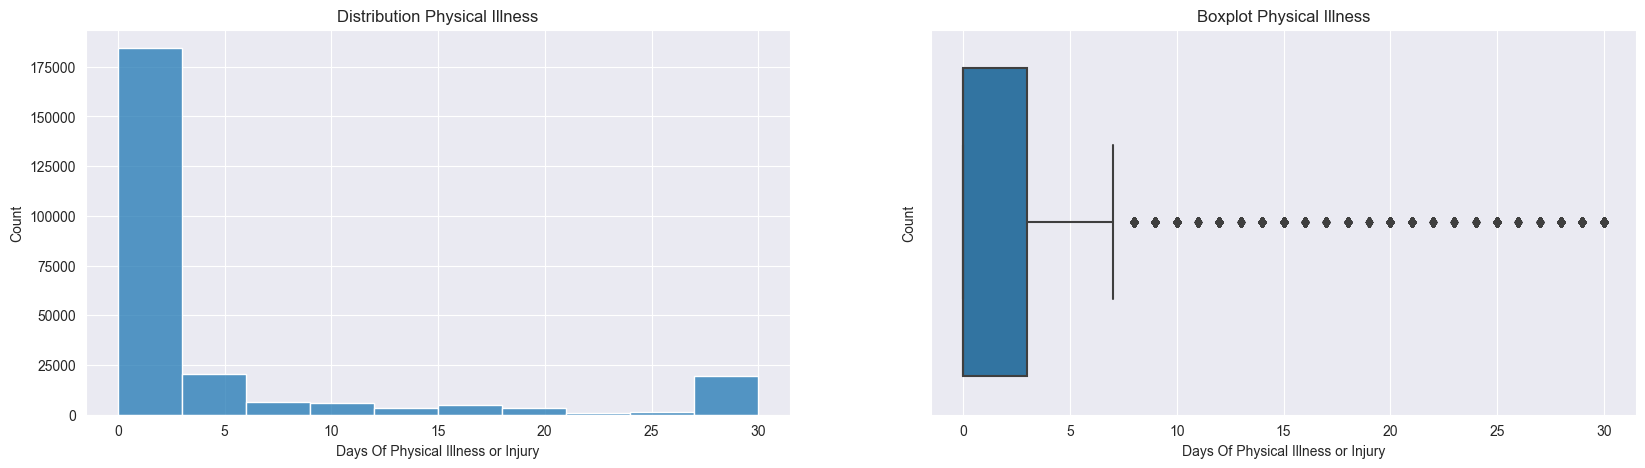

In [35]:
# Physical Illness distribution

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
b_size = np.arange(0, diabetes_df['PhysHlth'].max()+3,3)
sns.histplot(x='PhysHlth', data=diabetes_df, color = basecolor, bins = b_size)
add_labels("Distribution Physical Illness", "Days Of Physical Illness or Injury", "Count")

plt.subplot(1,2,2)
sns.boxplot(x = 'PhysHlth', data= diabetes_df )
add_labels("Boxplot Physical Illness", "Days Of Physical Illness or Injury", "Count")

plt.show()


This went as expected, since the majoriry of individuals indicated they have a good a very good health.

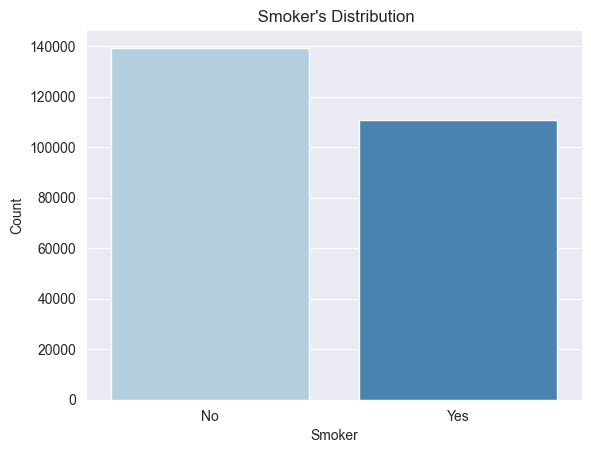

In [36]:
# Smokers Distribution

sns.countplot(x='Smoker', data=diabetes_df, palette = "Blues")
plt.gca().set_xticks([0,1])
plt.gca().set_xticklabels(["No", "Yes"])
add_labels(" Smoker's Distribution", "Smoker", "Count")

plt.show()


The data shows that approximately 140,000 individuals, or 55%, do not smoke. However, there is a significant portion of the dataset, approximately 45%, that reports smoking.

## Summary Distribution Analysis
- There is around 35,000 or 13% of the individuals have diabetes or prediabetes
- The median Body Mass Index (BMI) in the sample falls within the range of 25 to 30. However, it is important to note that there are individuals with BMI values exceeding 30, which may indicate an increased risk for conditions such as overweight, obesity, and morbid obesity.
- The dataset comprises approximately 140,000 individuals, or 55%, who identify as women and approximately 113,680 individuals, or 45%, who identify as men.
- Over 110,000 individuals in the dataset have completed their college or technical school education, while approximately 70,000 have not. Additionally, around 62,000 individuals have completed their high school education, while 11,680 individuals, or 4.5% of the dataset, have not graduated from high school.
- More than half of the individuals in the dataset fall within the age range of 50 to 74 years.
- The data shows that over 200,000 individuals, or 78%, did not experience a time in the past 12 months when they needed to see a doctor but were unable to do so due to cost.
- Approximately 248,000 individuals, or 97%, have some form of insurance or health coverage.
- Over 249,000 individuals, or 98%, have checked their cholesterol levels in the past 5 years.
- Approximately 210,000 individuals, or 79%, do not report difficulty with activities such as walking or climbing stairs. However, there are around 40,000 individuals who do report difficulty.
- The majority of individuals in the dataset do not engage in excessive alcohol consumption, with only around 10,000 individuals, or 4%, reporting such behavior.
- The data shows that 99% of individuals have not had a stroke.
- Around 200,000 individuals, or 78%, consume vegetables one or more times per day. However, 63% prefer to consume fruits.
- A significant portion of individuals in the dataset, approximately 40%, have reported a history of high blood pressure, while 39% have reported elevated cholesterol levels.
- Approximately 200,000 individuals, or 75%, have reported struggling with mental health for an average of 0 to 3 days per month.
- The data shows that approximately 140,000 individuals, or 55%, do not smoke, while a significant portion of the dataset, approximately 45%, reports smoking.

# Correlation Analysis
In this phase of analysis, the focus will be on identifying relationships or correlations between variables that may impact, influence, or be a contributing factor for individuals with diabetes or prediabetes, such as Body Mass Index (BMI), smoking status, dietary habits, physical activity, age, gender, etc.
 

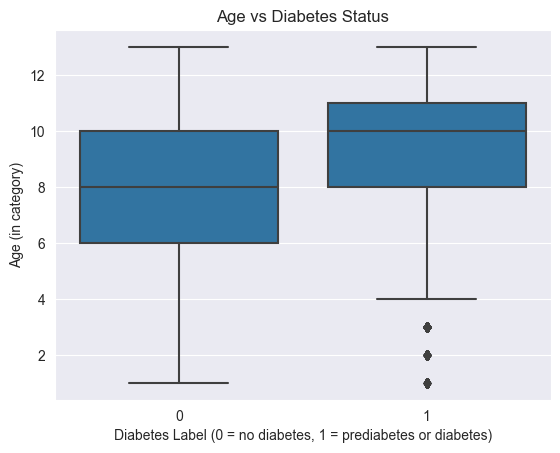

In [37]:
# I will start checking the relation between age and people that have or not diabetes to dertermine whether certain age category is more affected or not.

sns.boxplot(x='Diabetes_binary', y='Age', data=diabetes_df, color = basecolor)
plt.title('Age vs Diabetes Status')
plt.xlabel('Diabetes Label (0 = no diabetes, 1 = prediabetes or diabetes)')
plt.ylabel('Age (in category)')
plt.show()

- It can be observed that individuals diagnosed with diabetes or prediabetes tend to be within the age range of 64 to 69 years old, as represented by category 10. The age range begins at category 4, which corresponds to individuals aged 35 and above. There are, however, instances of individuals below the age of 35 who have been diagnosed with diabetes or prediabetes.

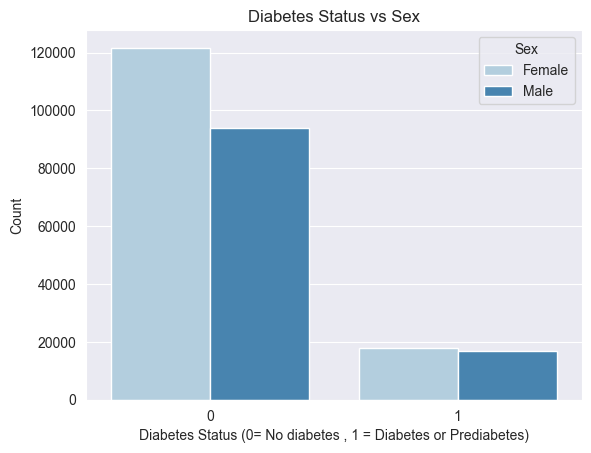

In [38]:
# Next, I will check which gender have most people with diabetes

sns.countplot(x='Diabetes_binary', data = diabetes_df, hue = 'Sex', palette = "Blues")
add_labels('Diabetes Status vs Sex', 'Diabetes Status (0= No diabetes , 1 = Diabetes or Prediabetes)', 'Count')
plt.legend(title = 'Sex',labels = ['Female', 'Male'], loc='upper right')
plt.show()

- Based on the data analyzed thus far, there appears to be a higher prevalence of diabetes in women compared to men. However, it is important to note that this observation alone does not provide sufficient evidence to conclude that women have a higher likelihood of developing diabetes compared to men. Further investigation and analysis is necessary to determine the underlying factors contributing to this disparity.

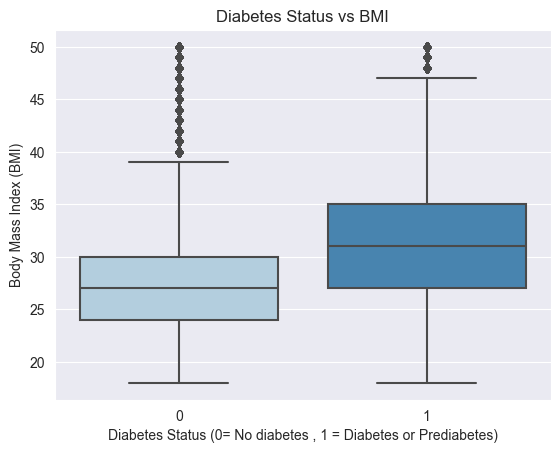

In [39]:
# Diabetes status vs BMI
sns.boxplot(x='Diabetes_binary', y='BMI', data = diabetes_df, palette = "Blues")
add_labels('Diabetes Status vs BMI', 'Diabetes Status (0= No diabetes , 1 = Diabetes or Prediabetes)', 'Body Mass Index (BMI)')
plt.show()

- It has been noted that individuals diagnosed with diabetes tend to have a higher Body Mass Index (BMI) compared to those without diabetes. The average BMI for individuals with diabetes is above 30, whereas the average BMI for those without diabetes is approximately 27.

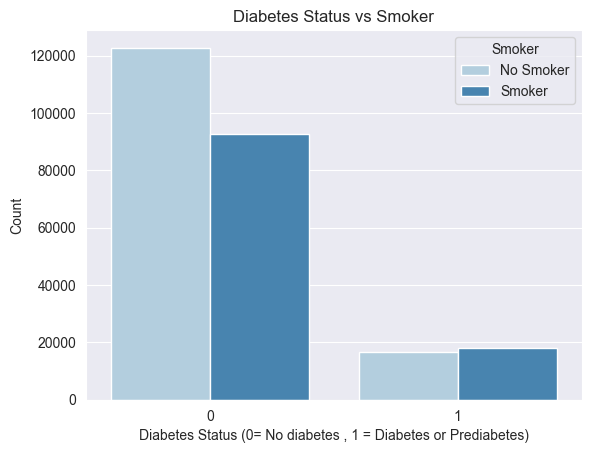

In [40]:
# Diabetes Status vs Smoker
sns.countplot(x='Diabetes_binary', data = diabetes_df, hue = 'Smoker', palette = "Blues")
add_labels('Diabetes Status vs Smoker', 'Diabetes Status (0= No diabetes , 1 = Diabetes or Prediabetes)', 'Count')
plt.legend(title = 'Smoker',labels = ['No Smoker', 'Smoker'], loc='upper right')
plt.show()

- The dataset appears to indicate that there is a higher proportion of individuals without diabetes and who do not smoke. However, it should be noted that among those who have been diagnosed with diabetes or prediabetes, there is a higher incidence of daily smoking.

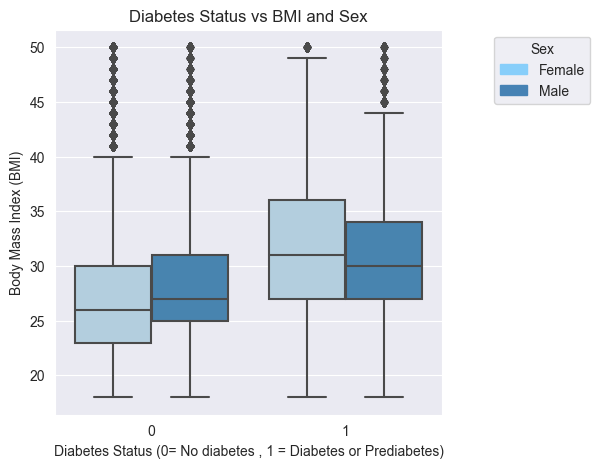

In [41]:
# Diabetes status vs BMI and Sex
import matplotlib.patches as mpatches

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.boxplot(x="Diabetes_binary",y="BMI",data=diabetes_df,hue='Sex', ax = axes, palette='Blues')
add_labels('Diabetes Status vs BMI and Sex', 'Diabetes Status (0= No diabetes , 1 = Diabetes or Prediabetes)', 'Body Mass Index (BMI)')
female_patch = mpatches.Patch(color='#87CEFA', label='Female')
male_patch = mpatches.Patch(color='#4682B4', label='Male')
axes.legend(title = 'Sex',handles=[female_patch, male_patch], loc='upper right', bbox_to_anchor = (1.4, 1))
plt.show()

The analysis of the data shows that for individuals without diabetes, there is no significant difference in the Body Mass Index (BMI) range between males and females, with both groups having an average BMI of approximately 27 for males and 26 for females. However, for individuals with diabetes or prediabetes, there is difference in the average BMI between males and females. The average BMI for females with diabetes or prediabetes is 31, while it is 30 for males. This discrepancy may suggest that males can develop diabetes at a lower BMI compared to females.

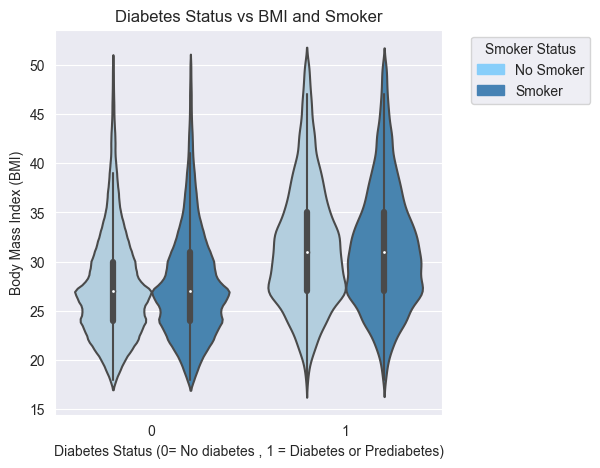

In [42]:
#Diabetes Status vs BMI and Smoker
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(5,5))
sns.violinplot(x="Diabetes_binary",y="BMI",data=diabetes_df,hue='Smoker', ax = axes, palette='Blues')
add_labels('Diabetes Status vs BMI and Smoker', 'Diabetes Status (0= No diabetes , 1 = Diabetes or Prediabetes)', 'Body Mass Index (BMI)')
No_smoker_patch = mpatches.Patch(color='#87CEFA', label='No Smoker')
smoker_patch = mpatches.Patch(color='#4682B4', label='Smoker')
axes.legend(title = 'Smoker Status',handles=[No_smoker_patch, smoker_patch], loc='upper right', bbox_to_anchor = (1.4, 1))
plt.show()


- The data analysis suggests that smoking does not appear to have a significant impact on an individual's Body Mass Index (BMI). However, it is worth noting that individuals with diabetes have a higher incidence of smoking compared to those without diabetes.

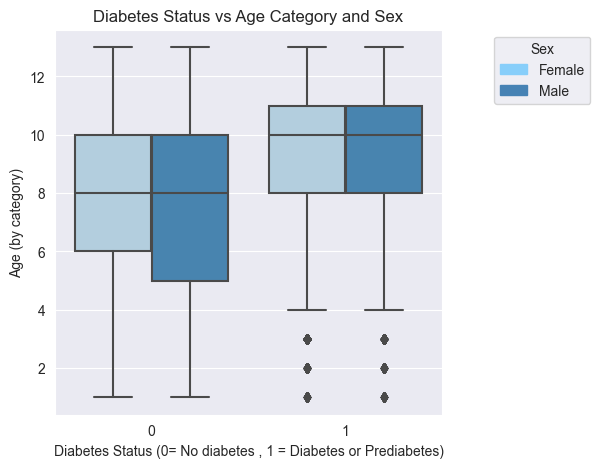

In [43]:
# Diabetes Status vs Age and Sex
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.boxplot(x="Diabetes_binary",y="Age",data=diabetes_df,hue='Sex', ax = axes, palette='Blues')
add_labels('Diabetes Status vs Age Category and Sex', 'Diabetes Status (0= No diabetes , 1 = Diabetes or Prediabetes)', 'Age (by category)')
female_patch = mpatches.Patch(color='#87CEFA', label='Female')
male_patch = mpatches.Patch(color='#4682B4', label='Male')
axes.legend(title = 'Sex',handles=[female_patch, male_patch], loc='upper right', bbox_to_anchor = (1.4, 1))
plt.show()

The data reveals that the median age for individuals with diabetes or at high risk of developing diabetes or prediabetes is consistent for both males and females, with a median value falling within the age range of 64-69 and classified under category 10. Additionally, the risk of developing diabetes after the age of 35 is the same for both sexes.

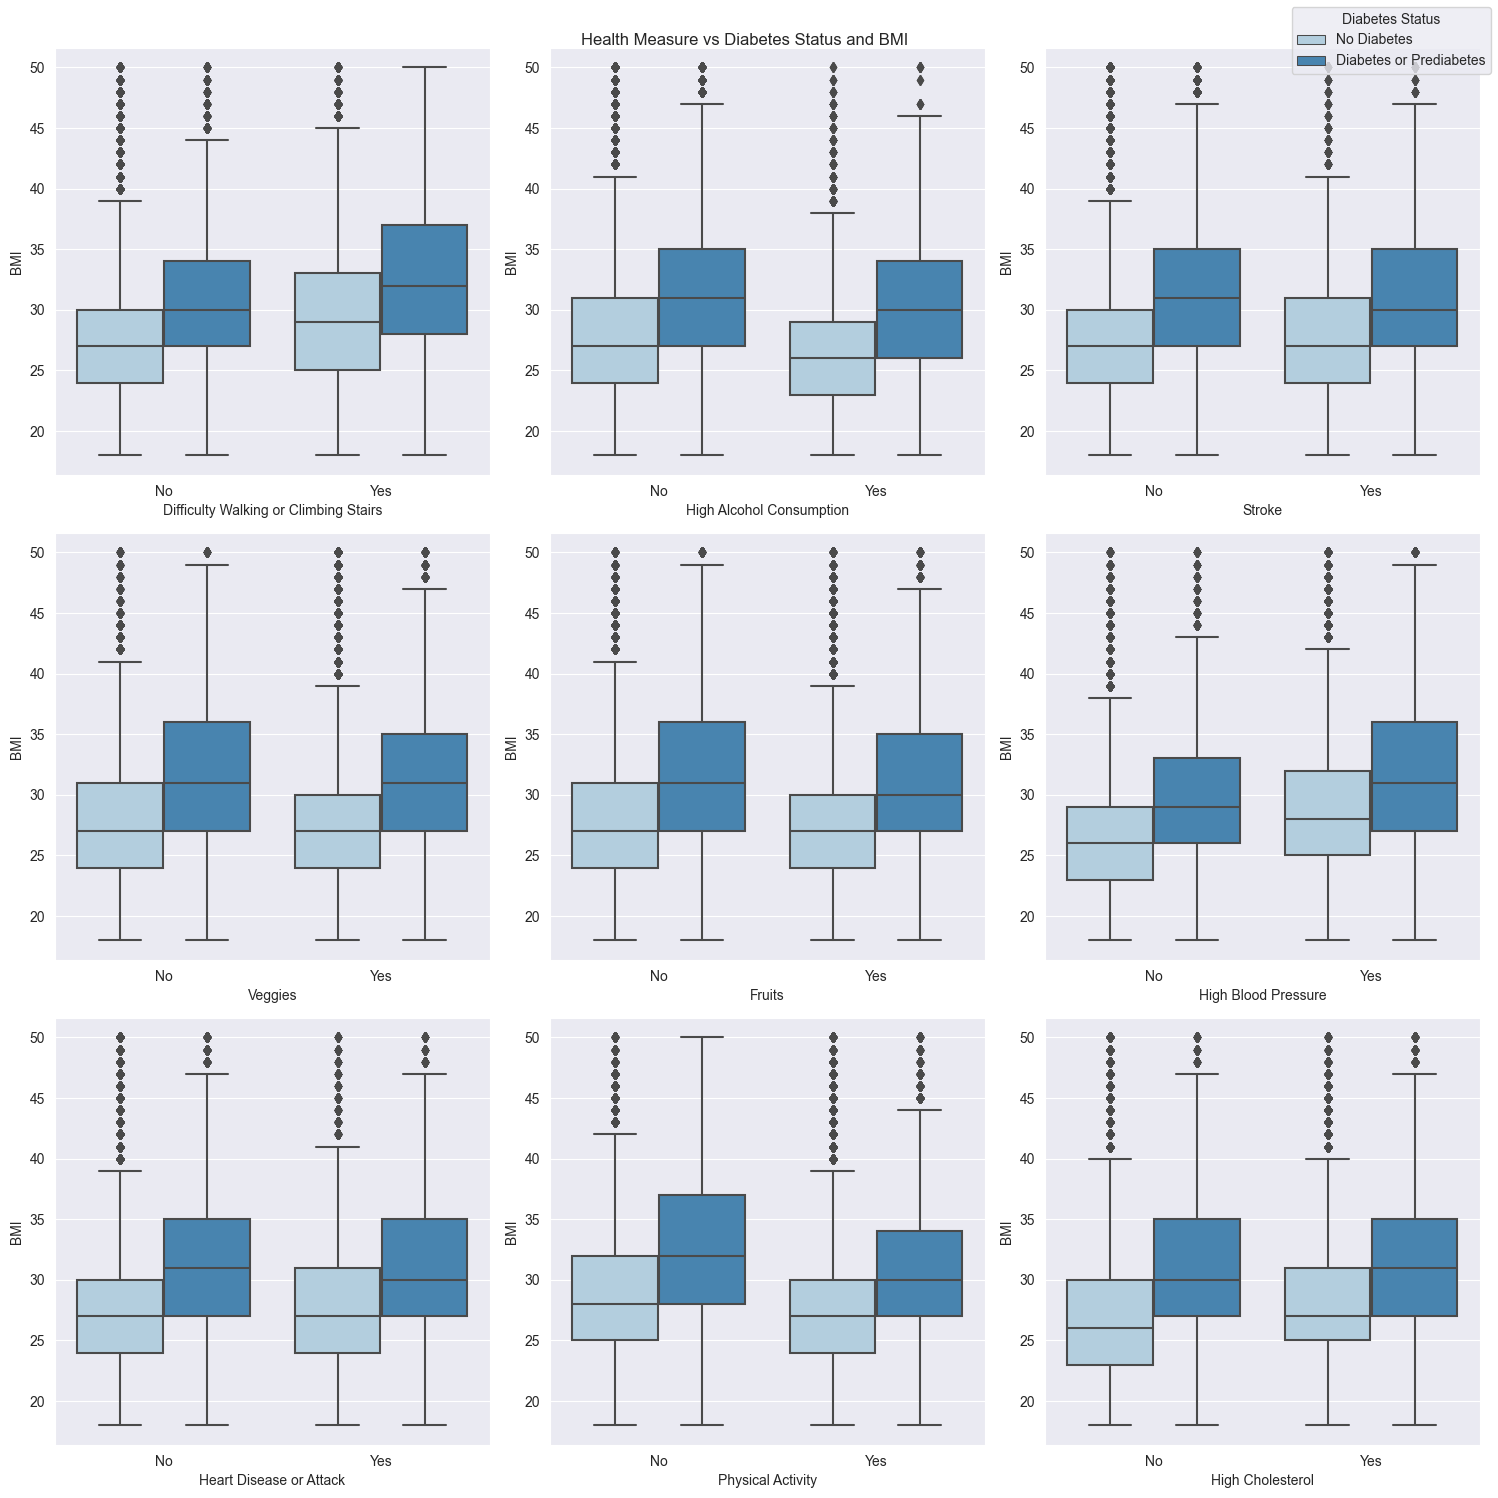

In [44]:
#Correlation plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Health Measure vs Diabetes Status and BMI')
        
sns.boxplot(x='DiffWalk', y='BMI', hue= 'Diabetes_binary', data = diabetes_df, ax=ax[0, 0],  palette='Blues')
sns.boxplot(x='HvyAlcoholConsump', y='BMI', hue= 'Diabetes_binary',data=diabetes_df, ax=ax[0, 1],  palette='Blues')
sns.boxplot(x= 'Stroke', y='BMI', hue= 'Diabetes_binary',data=diabetes_df, ax=ax[0, 2],  palette='Blues')
sns.boxplot(x='Veggies', y='BMI', hue= 'Diabetes_binary',data=diabetes_df, ax=ax[1, 0],  palette='Blues')
sns.boxplot(x='Fruits', y='BMI', hue= 'Diabetes_binary',data=diabetes_df, ax=ax[1, 1],palette='Blues') 
sns.boxplot(x='HighBP',y='BMI', hue= 'Diabetes_binary', data=diabetes_df, ax=ax[1, 2],  palette='Blues')
sns.boxplot(x='HeartDiseaseorAttack',y='BMI', hue= 'Diabetes_binary', data=diabetes_df, ax=ax[2, 0],  palette='Blues')
sns.boxplot(x='PhysActivity', y='BMI', hue= 'Diabetes_binary',data=diabetes_df, ax=ax[2, 1],  palette='Blues')
sns.boxplot(x='HighChol', y='BMI', hue= 'Diabetes_binary',data=diabetes_df, ax=ax[2, 2],  palette='Blues') 


plt.tight_layout()

for i in range(3):
    for j in range(3):
        ax[i,j].set_xticks([0,1])
        ax[i,j].set_xticklabels(['No','Yes'])

for axes in ax.flat:
    axes.get_legend().remove()
handles, labels = axes.get_legend_handles_labels()
labels = ['No Diabetes', 'Diabetes or Prediabetes']
fig.legend(handles, labels, title ='Diabetes Status', loc = 'upper right')

labels = ['Difficulty Walking or Climbing Stairs', 'High Alcohol Consumption', 'Stroke','Veggies','Fruits','High Blood Pressure','Heart Disease or Attack','Physical Activity','High Cholesterol']
for i, row in enumerate(ax):
    for j, subplot in enumerate(row):
        subplot.set_xlabel(labels[i*3+j])
plt.show()

## Correlation Analysis Summary

- Individuals diagnosed with diabetes or prediabetes tend to be in the age range of 64-69 years old (category 10), with some cases below 35 years old.
- Higher prevalence of diabetes in women than men, but further investigation needed to determine the cause.
- Individuals with diabetes tend to have higher BMI (average above 30) than those without (average around 27).
- Higher proportion of non-smokers among individuals without diabetes. Higher incidence of daily smoking among those with diabetes or prediabetes.
- No significant difference in BMI range between males and females without diabetes, but difference in average BMI between males and females with diabetes or prediabetes (females 31, males 30).
- Smoking doesn't seem to have significant impact on BMI, but individuals with diabetes have higher incidence of smoking.
- Median age for individuals with diabetes or high risk of developing diabetes is 64-69, consistent for both males and females. Same risk of developing diabetes after 35 for both sexes.
- Individuals with health conditions such as high cholesterol, high blood pressure, difficulty walking or climbing stairs, and diagnosed with diabetes or prediabetes have higher median BMI than those without diabetes, suggesting a link between high BMI and these health conditions.
- Individuals with diabetes and high alcohol consumption tend to have higher BMI (average 30) than those with alcohol consumption but without diabetes.
- Individuals who eat fruit have lower BMI than those with diabetes and no fruit consumption.
- Individuals without diabetes who don't do any physical activity have higher BMI than those with diabetes who do physical activity.

# Data Questions

**Question 1**

Does heavy alcohol consumption increase the risk of having diabetes or prediabetes in the population?

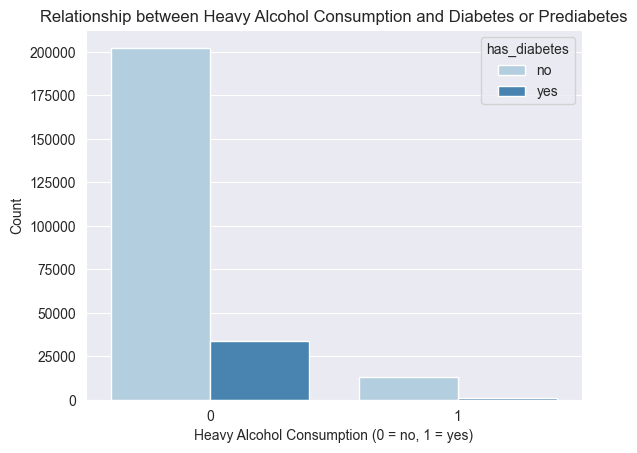

In [45]:
diabetes_df["has_diabetes"] = diabetes_df["Diabetes_binary"].apply(lambda x: "yes" if x == 1 else "no")

# Plot the relationship between heavy alcohol consumption and diabetes or prediabetes
sns.countplot(x="HvyAlcoholConsump", hue="has_diabetes", data=diabetes_df, palette= 'Blues')
plt.xlabel("Heavy Alcohol Consumption (0 = no, 1 = yes)")
plt.ylabel("Count")
plt.title("Relationship between Heavy Alcohol Consumption and Diabetes or Prediabetes")
plt.show()

Approximately 200,000 individuals in the dataset are free of diabetes and engage in limited alcohol consumption. Nevertheless, a limited proportion of individuals with diabetes have a high alcohol intake, indicating that heavy alcohol consumption may not necessarily result in diabetes, but may be associated with other health conditions.

**Quetion 2**

What is the relationship between daily fruit and vegetable consumption and diabetes status in the population?

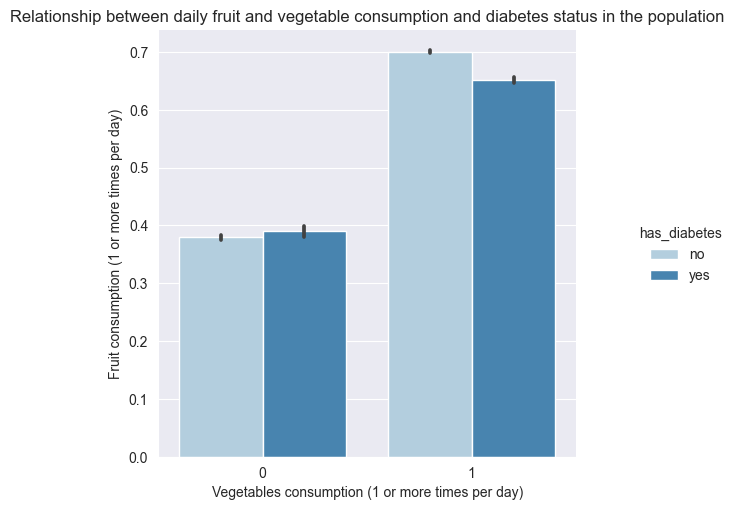

In [46]:
sns.catplot(x="Veggies", y="Fruits", hue="has_diabetes", kind="bar", data=diabetes_df, palette= 'Blues')
plt.title("Relationship between daily fruit and vegetable consumption and diabetes status in the population")
plt.xlabel("Vegetables consumption (1 or more times per day)")
plt.ylabel("Fruit consumption (1 or more times per day)")
plt.show()

It is observed that there is a significant difference in the daily consumption of fruits and vegetables between individuals without diabetes and those with diabetes. This suggests a potential correlation between a daily intake of fruits and vegetables and the presence of diabetes or prediabetes.

**Question 3**

What is the relationship between Body Mass Index (BMI) and the likelihood of having diabetes or prediabetes in the population?

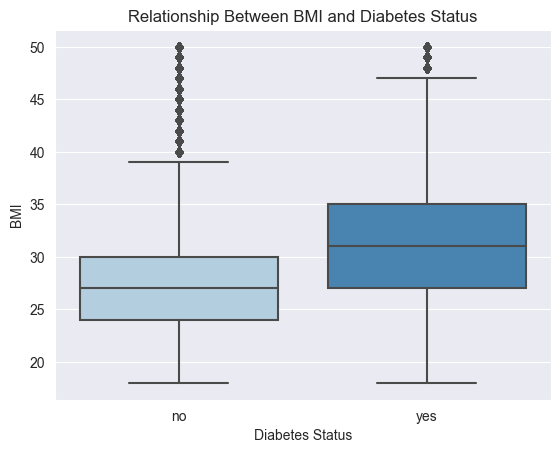

In [47]:
sns.boxplot(x='has_diabetes', y='BMI', data=diabetes_df, palette= 'Blues')
add_labels('Relationship Between BMI and Diabetes Status', 'Diabetes Status', 'BMI')
plt.show()

It can be noted from the data that there is a significant difference in the average Body Mass Index (BMI) between individuals with diabetes or prediabetes (31) and those without diabetes (27). Additionally, there is a higher occurrence of individuals with a BMI above 40 among those diagnosed with diabetes, implying a correlation between higher BMI and an increased likelihood of having diabetes or being prediabetic.

**Question 4**

is there a correlation between age and diabetes staus in the population?

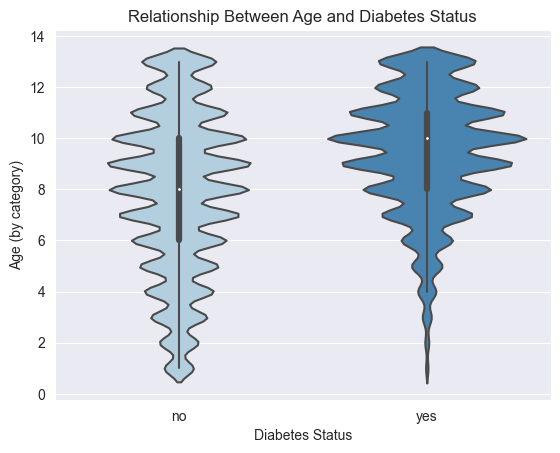

In [48]:
sns.violinplot(x='has_diabetes', y='Age', data=diabetes_df, palette= 'Blues')
add_labels('Relationship Between Age and Diabetes Status', 'Diabetes Status', 'Age (by category)')
plt.show()

Individuals within the age range of 35-69 years old, particularly those in the 64-69 year old category (Category 10), tend to be diagnosed with either diabetes or prediabetes. It is noteworthy that the incidence rate begins to increase in the category starting from age 35.

## Summary

- Among individuals without diabetes, a large number of them consume alcohol in limited amounts.A small proportion of individuals with diabetes have a high intake of alcohol.
- Heavy alcohol consumption may not cause diabetes, but it could be related to other health issues.
- There's a noticeable difference in the daily fruit and vegetable consumption between individuals with and without diabetes.This suggests a possible connection between the daily intake of fruits and vegetables and the risk of developing diabetes or prediabetes.
- The data shows a significant difference in the average BMI between individuals with diabetes or prediabetes (31) and those without diabetes (27). I  also observed a higher occurrence of individuals with a BMI above 40 among those diagnosed with diabetes, implying a link between a higher BMI and a greater likelihood of having diabetes or prediabetes.
- Individuals between the ages of 35 and 69, particularly those in the 64-69 year old category (Category 10), are more likely to be diagnosed with either diabetes or prediabetes.The rate of incidence begins to increase starting from the age category of 35.


# Data Enrichement

Assuming we have ample resources and funding, I would seek out additional data sources to complement the existing data and enhance its completeness.

I would begin by obtaining information from trusted organizations such as the World Health Organization, the Centers for Disease Control and Prevention, and the National Institutes of Health. These sources could provide details about various lifestyle and health aspects related to diabetes, like physical activity, smoking, alcohol intake, and diet.

Medical records data: This would offer greater understanding of each individual's medical history, including any pre-existing health conditions and hospitalization records, etc. I would source this data from electronic medical records or health insurance providers.

Environmental information: This would provide insight into air quality, exposure to pollutants, and access to nutritious food options, among others. I would retrieve this data from public health and environmental protection agencies.

Lifestyle details: This would include information on daily habits and routines, like sleep patterns, exercise habits, and stress levels. I would gather this data from wearable technology such as fitness trackers or from self-reported surveys.

Genetic information: This would provide details on genetic predisposition to certain diseases, such as diabetes. I would acquire this data from commercial genetic testing companies.

After obtaining these additional data sources, I would integrate them with the existing data using a "left join" operation. This approach would retain all data from the original dataset and fill any missing data with information from the new sources.

With this expanded dataset, I could answer questions like "What are the key risk factors for diabetes?" and "How does the environment influence diabetes risk?" with greater precision and depth.

By incorporating multiple sources of data, I could provide a more comprehensive understanding of the factors that contribute to diabetes risk.